In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import sys
import matplotlib.pyplot as plt
import master_data_functions.functions as dfunc

# silence deprecation warnings from tensorflow
import warnings
warnings.simplefilter('ignore', FutureWarning)

# File import
# Sample filenames are:
# CeBr10kSingle_1.txt -> single events, 
# CeBr10kSingle_2.txt -> single events
# CeBr10k_1.txt -> mixed single and double events 
# CeBr10.txt -> small file of 10 samples

keywords = {
    "single_1": "CeBr10kSingle_1",
    "single_2": "CeBr10kSingle_2",
    "mix": "CeBr10k_1",
    "small": "CeBr10"}
    
dataset = "mix"
data = dfunc.import_data("sample")
images = data[keywords[dataset]]["images"]
energies = data[keywords[dataset]]["energies"]
positions = data[keywords[dataset]]["positions"]
labels = to_categorical(data[keywords[dataset]]["labels"])
n_classes = labels.shape[1]


print("Number of classes: {}".format(n_classes))
print("Energies shape: {}".format(energies.shape))
print("Positions shape: {}".format(positions.shape))
print("Labels shape: {}".format(labels.shape))


/home/geir/git/master_analysis/notebooks/pretrained/pretrained_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/geir/git/master_analysis/notebooks/pretrained/pretrained_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/geir/git/master_analysis/notebooks/pretrained/pretrained_venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'

Number of classes: 2
Energies shape: (10000, 2)
Positions shape: (10000, 4)
Labels shape: (10000, 2)


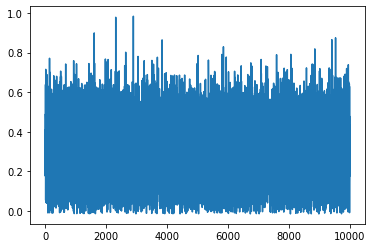

In [2]:

# Scale data to [0, 1] interval by the global maximum intensity
# images = images/np.amax(images)

# Get max intensity for each image
max_intensities = np.amax(images, axis=(1,2))
plt.plot(np.arange(len(max_intensities)), max_intensities)
plt.show()
    

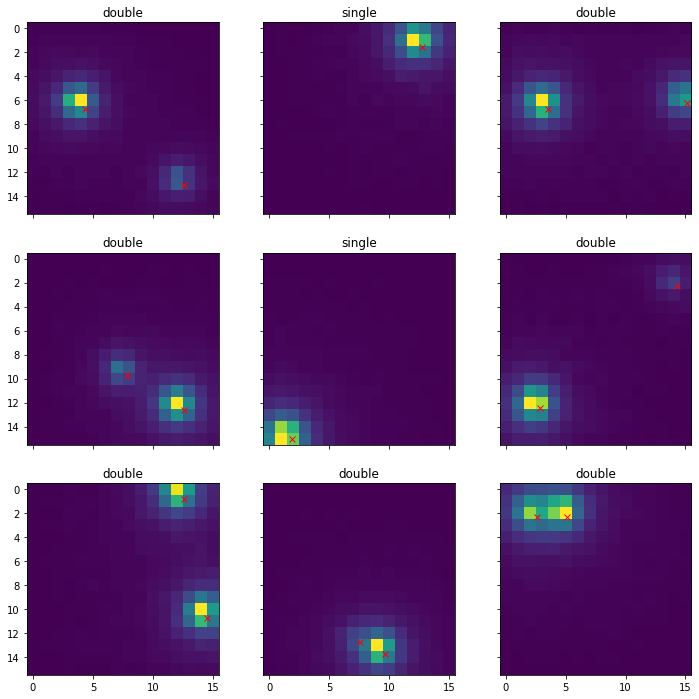

In [3]:
# Plot some images, with electron origin positions
%matplotlib inline

images = images.reshape(images.shape[0],16,16)
index = 0
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,12))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].imshow(images[index + i*3 + j])
        
        # plot origin of event
        x = positions[index + i*3 + j, 0]
        y = positions[index + i*3 + j, 1]
        ax[i, j].plot(x, y, 'rx')
        ax[i, j].set_title('single')
        if positions[index + i*3 + j, 3] != -100:
            x2 = positions[index + i*3 + j, 2]
            y2 = positions[index + i*3 + j, 3]
            ax[i, j].plot(x2, y2, 'rx')
            ax[i, j].set_title('double')
        
plt.show()

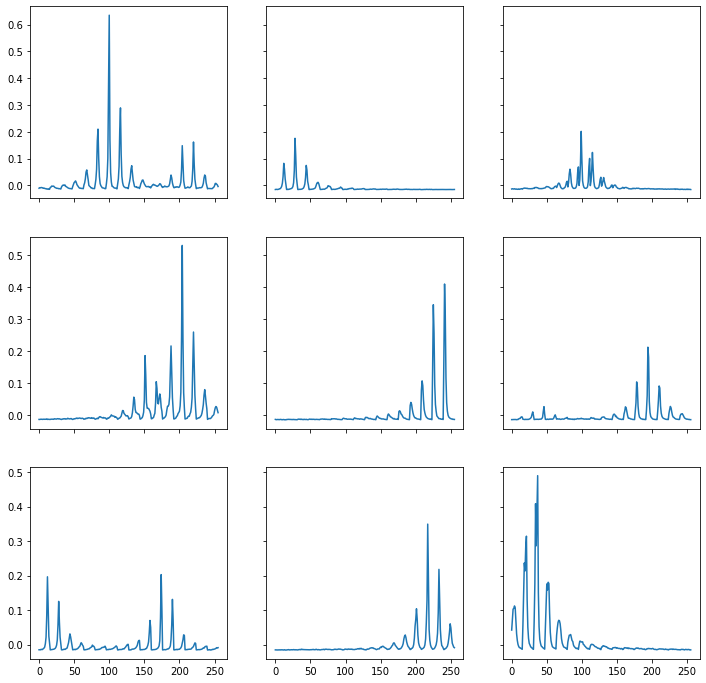

In [4]:
# Plot pixel by pixel intensity
index = 0
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,12))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].plot(range(256), images[index + i*3 + j].flatten())
plt.show()